# <font color='blue'>Data Science Challenge @ ITA 2022</font>
# <font color='blue'>Equipe DIOMGIS</font>

## <font color='blue'>Fase 1</font>

### <font color='blue'>TEMA DO DESAFIO</font>

![title](..\data\image\logo.jpeg)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Bibliotecas e Frameworks

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from time import time
from datetime import datetime
import os
import joblib

In [4]:
# Versões dos pacotes usados neste jupyter notebook

%reload_ext watermark
%watermark -a "Equipe DIOMGIS" --iversions

Author: Equipe DIOMGIS

numpy     : 1.22.3
matplotlib: 3.5.1
seaborn   : 0.11.2
pandas    : 1.4.2



In [5]:
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
verbose = 1
seed = 25

np.random.seed(seed)

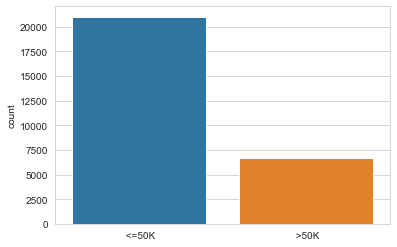

In [7]:
# Dados
import pickle

with open('data/census.pkl', 'rb') as f:
    [x_treino, y_treino, x_teste, y_teste] = pickle.load(f)
    
sns.countplot(y_treino);

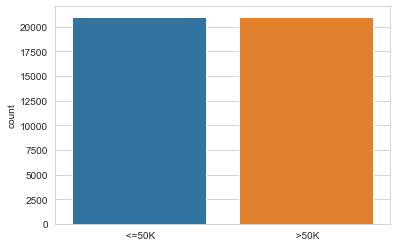

In [8]:
# Balanceamento de classes

sm = SMOTE(sampling_strategy = 'auto',
           random_state = None,
           k_neighbors = 5,
           n_jobs = None)

x_treino, y_treino = sm.fit_resample(x_treino, y_treino)

sns.countplot(y_treino);

In [9]:
# Parametros fixos de treinamento

nKFold = 5
nPCA = 108

In [10]:
# Principal Component Analysis

reduceDim = PCA(n_components = nPCA,
                copy = True,
                whiten = False,
                svd_solver = 'auto',
                tol = 0.0,
                iterated_power = 'auto',
                n_oversamples = 10,
                power_iteration_normalizer = 'auto',
                random_state = None)

reduceDim.fit(x_treino)

x_treino = reduceDim.transform(x_treino)
x_teste = reduceDim.transform(x_teste)

In [11]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_treino = le.fit_transform(y_treino)
y_teste = le.transform(y_teste)

In [12]:
# Definição dos parametros (GridSearch)

params_grid = {
               #['log_loss', 'deviance', 'exponencial']
              'loss': ['log_loss'],
    
               # trade-off entre learning_rate e n_estimators
              'learning_rate': [0.1],
    
               # O número de estágios de reforço a serem executados 
              'n_estimators': [100],
    
               # A fração de amostras a ser usada para ajustar os alunos de base individuais
              'subsample': [1.0],
               
               # ['friedman_mse', 'squared_error', 'mse'] 
              'criterion': ['friedman_mse'],
    
               # O número mínimo de amostras necessárias para dividir um nó interno
              'min_samples_split': [2],
    
               # O número mínimo de amostras necessárias para estar em um nó folha
              'min_samples_leaf': [1],
    
               # A fração ponderada mínima da soma total de pesos necessária para estar em um nó folha
              'min_weight_fraction_leaf': [0.0],
    
               # A profundidade máxima dos estimadores de regressão individuais
              'max_depth': [3],
    
               # Um nó será dividido se esta divisão induzir uma diminuição da impureza maior ou igual a este valor
              'min_impurity_decrease': [0.0],
    
               # Um objeto estimador que é usado para calcular as previsões iniciais
              'init': [None],
    
              # ['auto', 'sqrt', 'log2'], int ou float. O número de recursos a serem considerados ao procurar a melhor divisão
              'max_features': [None],
    
              # [int]. Cultive árvores max_leaf_nodes da melhor maneira possível
              'max_leaf_nodes': [None],
              
              # Quando definido como True, reutilize a solução da chamada anterior para ajustar e adicione
              # mais estimadores ao ensemble, caso contrário, apenas apague a solução anterior
              'warm_start': [False],
    
              # A proporção de dados de treinamento a serem reservados como validação
              # definida para interrupção antecipada
              'validation_fraction': [0.1],
    
              # usado para decidir se a interrupção antecipada será usada para encerrar
              # o treinamento quando a pontuação de validação não estiver melhorando
              'n_iter_no_change': [None],
    
              # Tolerância para a parada antecipada
              'tol': [0.0001],
    
              # Parâmetro de complexidade usado para remoção de complexidade de custo mínimo.
              # A subárvore com a maior complexidade de custo que for menor do que ccp_alphaserá escolhida
              'ccp_alpha': [0.0]
}

In [13]:
# Grid Search e Cross Validation

model = GradientBoostingClassifier(random_state = seed, verbose = verbose)

grid = GridSearchCV(estimator = model,
                    param_grid = params_grid,
                    # scoring = 'accuracy',
                    refit = True,
                    cv = nKFold,
                    return_train_score = False,
                    # n_jobs = -2, # "-2": mantem 1 processador livre
                    # pre_dispatch = '2*n_jobs',
                    verbose = verbose)

In [14]:
# View grid

grid

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(random_state=25, verbose=1),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['friedman_mse'],
                         'init': [None], 'learning_rate': [0.1],
                         'loss': ['log_loss'], 'max_depth': [3],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_iter_no_change': [None],
                         'subsample': [1.0], 'tol': [0.0001],
                         'validation_fraction': [0.1], 'warm_start': [False]},
             verbose=1)

In [15]:
# Treinamento

fit_params = {'monitor': None}

grid_result = grid.fit(x_treino, y_treino, **fit_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
      Iter       Train Loss   Remaining Time 
         1           1.3032            1.94m
         2           1.2350            1.89m
         3           1.1763            1.85m
         4           1.1289            1.82m
         5           1.0870            1.80m
         6           1.0517            1.78m
         7           1.0208            1.75m
         8           0.9941            1.74m
         9           0.9712            1.72m
        10           0.9508            1.71m
        20           0.8372            1.51m
        30           0.7871            1.31m
        40           0.7597            1.13m
        50           0.7394           56.50s
        60           0.7246           45.26s
        70           0.7116           33.98s
        80           0.7007           22.70s
        90           0.6914           11.38s
       100           0.6836            0.00s
      Iter       Train Loss   Remaining 

In [16]:
# Resultado do SearchGridCV

pd.concat([
           pd.DataFrame(grid.cv_results_)[['rank_test_score', 'mean_test_score', 'mean_fit_time']],
           pd.DataFrame(grid.cv_results_['params'])
          ],
           axis=1,
           join='inner').set_index('rank_test_score').sort_values('rank_test_score')

,mean_test_score,mean_fit_time,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_iter_no_change,subsample,tol,validation_fraction,warm_start
rank_test_score,,,,,,,,,,,,,,,,,,,,
1,0.836068,115.496128,0.0,friedman_mse,None,0.1,log_loss,3,None,None,0.0,1,2,0.0,100,None,1.0,0.0001,0.1,False


In [17]:
best_params = grid.best_params_
best_model = grid.best_estimator_

In [18]:
best_model.score(x_treino, y_treino)

0.8462690826080753

In [19]:
best_model.score(x_teste, y_teste)

0.8022517911975435

In [26]:
joblib.dump(best_model, "bestModel/{}xgboostModel.pkl".format(time()))


['bestModel/1665770037.8164032xgboostModel.pkl']

### Recuperando Modelo Salvo

In [30]:
timeSaved = 1665770037.8164032
recoveryModel = joblib.load("bestModel/{}xgboostModel.pkl".format(timeSaved))

In [31]:
recoveryModel.score(x_treino, y_treino)

0.8462690826080753

In [32]:
recoveryModel.score(x_teste, y_teste)

0.8022517911975435

## Carregando o Conjunto de dados

## Análise Exploratória de Dados

### Análise n - XXX

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

### Padronização

###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

### Avaliação do Modelo

### Métricas

### Resíduos

###  Construção, Treinamento e Avaliação do Modelo n com XXX

## Seleção do Modelo

## Conclusão

# Fim